# Regressão 01 - tarefa 01

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset

import statsmodels.formula.api as smf

In [114]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

(0.0, 10.5)

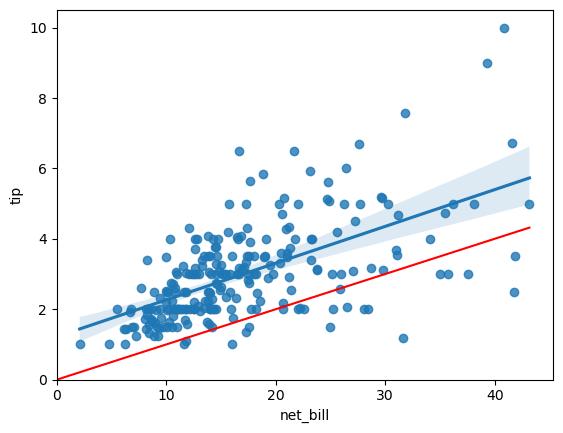

In [115]:
# Scatterplot
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Generating data for the 10% Brazilian Tip line in São Paulo - SP.
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# plotting
plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

**Exibe um resumo dos resultados:**

In [116]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           5.02e-23
Time:                        16:55:08   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 0.505398619388979)

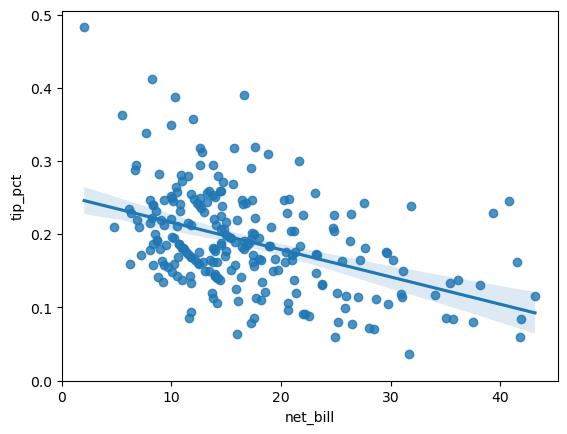

In [117]:
# Scatterplot
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [118]:
reg_1 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.52e-06
Time:                        16:55:08   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

- São gráficos com relações opostas. No primeiro gráfico de dispersão, ao aumentar o valor de X também aumentamos o valor de Y, o modelo tem um R² que explica toda a variabilidade dos dados de resposta ao redor de sua médiaem 33%.<br>
Já o segundo gráfico de dispersão, ao aumentar o valor de X temos uma queda no valor de Y, enquanto o R² de 9,1% deixa de ter uma boa métrica para explicar os dados.
<br><br>

- These are graphs with opposite relationships. In the first scatter plot, when increasing the value of X we also increase the value of Y, the model has an R² that explains all the variability of the response data around its mean by 33%.<br>
As for the second scatter plot, when the value of X increases we have a drop in the value of Y, while the R² of 9.1% no longer has a good metric to explain the data.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 2, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [119]:
# copy data for prediction
tips_1 = tips.copy()
tips_1

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


In [120]:
# Predicted value of the variable "tip_pct".
pred_tip_pct = reg_1.fittedvalues
pred_tip_pct

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [121]:
# Creating the columns:
tips_1['predict_tip_pct'] = pred_tip_pct
tips_1['new_tip'] = tips_1['net_bill'] * tips_1['predict_tip_pct']


# Rearrange the DataFrame with the desired order
tips_1 = tips_1.reindex(columns=['total_bill', 'sex', 'smoker', 
                                 'day', 'time', 'size', 'tip', 
                                 'new_tip', 'tip_pct', 'predict_tip_pct', 
                                 'net_bill'])
tips_1

,total_bill,sex,smoker,day,time,size,tip,new_tip,tip_pct,predict_tip_pct,net_bill
0,16.99,Female,No,Sun,Dinner,2,1.01,3.309254,0.063204,0.207087,15.98
1,10.34,Male,No,Sun,Dinner,3,1.66,2.186938,0.191244,0.251951,8.68
2,21.01,Male,No,Sun,Dinner,3,3.50,3.461450,0.199886,0.197684,17.51
3,23.68,Male,No,Sun,Dinner,2,3.31,3.668785,0.162494,0.180107,20.37
4,24.59,Female,No,Sun,Dinner,4,3.61,3.699998,0.172069,0.176358,20.98
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3,5.92,3.773120,0.256166,0.163268,23.11
240,27.18,Female,Yes,Sat,Dinner,2,2.00,3.790751,0.079428,0.150546,25.18
241,22.67,Male,Yes,Sat,Dinner,2,2.00,3.684707,0.096759,0.178264,20.67
242,17.82,Male,No,Sat,Dinner,2,1.75,3.319003,0.108899,0.206534,16.07


In [123]:
reg_2 = smf.ols('new_tip ~ net_bill', data = tips_1).fit()
print(reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:                new_tip   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     99.74
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           6.88e-20
Time:                        16:55:34   Log-Likelihood:                -192.63
No. Observations:                 244   AIC:                             389.3
Df Residuals:                     242   BIC:                             396.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2819      0.079     28.704      0.0

In [124]:
# Coefficient of determination (R²)
print(reg_2.rsquared)  


0.29185213963974843


- R² inicialmente foi de 33% e para nova condição predita R² foi de 29%.<br>
- R² initially was 33% and for the new predicted condition R² was 29%.